In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
%pip install numpy pandas

  Using cached pandas-1.4.2-cp39-cp39-win_amd64.whl (10.5 MB)
     -------------------------------------- 503.5/503.5 KB 6.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\HP\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [7]:
%pip install sklearn

You should consider upgrading via the 'c:\Users\HP\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.4/7.4 MB 12.1 MB/s eta 0:00:00
     -------------------------------------- 307.0/307.0 KB 9.6 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=c30529ba42bcb8c5261b18228705393656dc6e863b4bdbf0dc19d8868465dac4
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt
# import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [9]:
df = pd.read_csv('dataset.csv')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.drop(['Symptom_8','Symptom_9','Symptom_10','Symptom_11','Symptom_12','Symptom_13','Symptom_14','Symptom_15','Symptom_16','Symptom_17'],axis=1,inplace=True)

In [11]:
df.shape

(4920, 8)

**Check Null Values**

In [12]:
df.isna().sum()

Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
dtype: int64

In [13]:
# Percentage of Missing Values
(df.isnull().sum()/df.shape[0])*100

Disease       0.000000
Symptom_1     0.000000
Symptom_2     0.000000
Symptom_3     0.000000
Symptom_4     7.073171
Symptom_5    24.512195
Symptom_6    40.365854
Symptom_7    53.902439
dtype: float64

In [14]:
plt.figure(figsize=(9,10))
sns.heatmap(df.isnull(),cbar=False)

NameError: name 'plt' is not defined

In [15]:
df.columns

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7'],
      dtype='object')

In [16]:
df.describe().T

,count,unique,top,freq
Disease,4920,41,Fungal infection,120
Symptom_1,4920,34,vomiting,822
Symptom_2,4920,48,vomiting,870
Symptom_3,4920,54,fatigue,726
Symptom_4,4572,50,high_fever,378
Symptom_5,3714,38,headache,348
Symptom_6,2934,32,nausea,390
Symptom_7,2268,26,abdominal_pain,264


In [17]:
#Remove Hyphen
for col in df.columns:
    df[col]= df[col].str.replace('_',' ')

In [18]:
cols = df.columns

data = df[cols].values.flatten()

reshaped = pd.Series(data)
reshaped = reshaped.str.strip()
reshaped = reshaped.values.reshape(df.shape)

df = pd.DataFrame(reshaped, columns = df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN


**Replacing Null Values**

In [19]:
df.fillna(0,inplace=True)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,0,0,0
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,0,0,0,0
3,Fungal infection,itching,skin rash,dischromic patches,0,0,0,0
4,Fungal infection,itching,skin rash,nodal skin eruptions,0,0,0,0


In [20]:
df.isna().sum()

Disease      0
Symptom_1    0
Symptom_2    0
Symptom_3    0
Symptom_4    0
Symptom_5    0
Symptom_6    0
Symptom_7    0
dtype: int64

In [21]:
df['Disease'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

**Importing Symptoms Dataset**

In [22]:
df_s = pd.read_csv('symptom-severity.csv')
df_s.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [23]:
# Remove Hyphen
df_s['Symptom']=df_s['Symptom'].str.replace('_',' ')

In [24]:
df_s['Symptom'].unique()

array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

In [25]:
a= np.array(df_s['weight'])
a

array([1, 3, 4, 4, 5, 3, 3, 5, 3, 4, 3, 5, 6, 6, 4, 3, 4, 5, 3, 3, 5, 2,
       6, 5, 4, 7, 3, 4, 3, 4, 5, 3, 3, 4, 5, 4, 4, 3, 4, 4, 6, 5, 4, 4,
       6, 6, 7, 6, 6, 5, 5, 4, 5, 4, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 4, 4,
       4, 4, 5, 5, 5, 6, 5, 5, 4, 5, 4, 4, 3, 2, 2, 4, 5, 5, 6, 4, 4, 4,
       3, 4, 5, 6, 5, 4, 5, 3, 2, 2, 2, 3, 4, 6, 6, 4, 5, 4, 5, 4, 4, 3,
       3, 5, 2, 7, 6, 4, 5, 4, 5, 6, 4, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 3,
       5], dtype=int64)

**Encoding Symptoms**

In [26]:
vals = df.values
symptoms = df_s['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df_s[df_s['Symptom'] == symptoms[i]]['weight'].values[0]
    
newdf = pd.DataFrame(vals, columns=cols)
newdf.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,Fungal infection,1,3,4,dischromic patches,0,0,0
1,Fungal infection,3,4,dischromic patches,0,0,0,0
2,Fungal infection,1,4,dischromic patches,0,0,0,0
3,Fungal infection,1,3,dischromic patches,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0


**No Symptoms assiging zero**

In [27]:
newdf = newdf.replace('dischromic  patches', 0)
newdf = newdf.replace('spotting  urination',0)
newdf = newdf.replace('foul smell of urine',0)
newdf.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,Fungal infection,1,3,4,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0
5,Fungal infection,3,4,0,0,0,0,0
6,Fungal infection,1,4,0,0,0,0,0
7,Fungal infection,1,3,0,0,0,0,0
8,Fungal infection,1,3,4,0,0,0,0
9,Fungal infection,1,3,4,0,0,0,0


**Selection of features for Training Purpose**

In [28]:
X = newdf.drop(['Disease'],axis=1)
y = newdf['Disease']

In [29]:
X.head()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,1,3,4,0,0,0,0
1,3,4,0,0,0,0,0
2,1,4,0,0,0,0,0
3,1,3,0,0,0,0,0
4,1,3,4,0,0,0,0


In [30]:
y.sample(6)

1484            Tuberculosis
121     Cervical spondylosis
1257                    GERD
1058             Hepatitis E
2168                Migraine
1910               Pneumonia
Name: Disease, dtype: object

**Splitting the dataset**

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score
from sklearn.svm import SVC

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=0)

In [33]:
clf_svc= SVC()
clf_svc.fit(X_train,y_train)

SVC()

In [34]:
predict = clf_svc.predict(X_test)

In [35]:
print('Accuracy Score: {}%'.format(round(accuracy_score(y_test,predict)*100,2)))

Accuracy Score: 95.43%


In [36]:
print(classification_report(y_test,predict))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       0.92      1.00      0.96        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       0.92      0.92      0.92        24
                                Allergy       0.83      1.00      0.91        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      0.96      0.98        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      0.88      0.93        24
                            Common Cold       1.00      0.88      0.93        24
                           

In [37]:
plt.figure(figsize=(12,15))
sns.heatmap(confusion_matrix(y_test,predict),annot=True,cbar=True,cmap='coolwarm')

NameError: name 'plt' is not defined

**Random Forest Classifier**

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
clf_rfc = RandomForestClassifier(n_estimators=700,random_state=0,n_jobs=-1,verbose=4)
clf_rfc.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 700building tree 2 of 700building tree 3 of 700

building tree 4 of 700building tree 5 of 700building tree 6 of 700

building tree 7 of 700

building tree 8 of 700

building tree 9 of 700
building tree 10 of 700
building tree 11 of 700
building tree 12 of 700
building tree 13 of 700
building tree 14 of 700building tree 15 of 700

building tree 16 of 700
building tree 17 of 700
building tree 18 of 700
building tree 19 of 700
building tree 20 of 700
building tree 21 of 700


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.5s


building tree 22 of 700
building tree 23 of 700
building tree 24 of 700
building tree 25 of 700
building tree 26 of 700
building tree 27 of 700
building tree 28 of 700
building tree 29 of 700
building tree 30 of 700
building tree 31 of 700
building tree 32 of 700building tree 33 of 700

building tree 34 of 700building tree 35 of 700

building tree 36 of 700
building tree 37 of 700
building tree 38 of 700building tree 39 of 700

building tree 40 of 700
building tree 41 of 700
building tree 42 of 700
building tree 43 of 700
building tree 44 of 700
building tree 45 of 700building tree 46 of 700

building tree 47 of 700building tree 48 of 700

building tree 49 of 700
building tree 50 of 700
building tree 51 of 700
building tree 52 of 700building tree 53 of 700

building tree 54 of 700
building tree 55 of 700
building tree 56 of 700
building tree 57 of 700building tree 58 of 700
building tree 59 of 700

building tree 60 of 700
building tree 61 of 700
building tree 62 of 700
building tree 63

[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    1.2s


building tree 105 of 700
building tree 106 of 700
building tree 107 of 700
building tree 108 of 700
building tree 109 of 700building tree 110 of 700
building tree 111 of 700
building tree 112 of 700

building tree 113 of 700
building tree 114 of 700building tree 115 of 700

building tree 116 of 700
building tree 117 of 700
building tree 118 of 700
building tree 119 of 700
building tree 120 of 700
building tree 121 of 700
building tree 122 of 700
building tree 123 of 700
building tree 124 of 700
building tree 125 of 700building tree 126 of 700

building tree 127 of 700building tree 128 of 700

building tree 129 of 700
building tree 130 of 700building tree 131 of 700

building tree 132 of 700
building tree 133 of 700
building tree 134 of 700
building tree 135 of 700
building tree 136 of 700
building tree 137 of 700
building tree 138 of 700
building tree 139 of 700
building tree 140 of 700
building tree 141 of 700
building tree 142 of 700
building tree 143 of 700
building tree 144 of 700


[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:    2.4s


building tree 218 of 700
building tree 219 of 700
building tree 220 of 700
building tree 221 of 700
building tree 222 of 700
building tree 223 of 700
building tree 224 of 700
building tree 225 of 700
building tree 226 of 700
building tree 227 of 700
building tree 228 of 700
building tree 229 of 700
building tree 230 of 700
building tree 231 of 700
building tree 232 of 700building tree 233 of 700

building tree 234 of 700
building tree 235 of 700
building tree 236 of 700
building tree 237 of 700
building tree 238 of 700building tree 239 of 700

building tree 240 of 700
building tree 241 of 700
building tree 242 of 700
building tree 243 of 700
building tree 244 of 700
building tree 245 of 700
building tree 246 of 700
building tree 247 of 700
building tree 248 of 700
building tree 249 of 700
building tree 250 of 700building tree 251 of 700

building tree 252 of 700building tree 253 of 700
building tree 254 of 700
building tree 255 of 700

building tree 256 of 700
building tree 257 of 700b

[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    4.2s


building tree 393 of 700
building tree 394 of 700
building tree 395 of 700
building tree 396 of 700
building tree 397 of 700
building tree 398 of 700building tree 399 of 700
building tree 400 of 700building tree 401 of 700

building tree 402 of 700

building tree 403 of 700
building tree 404 of 700
building tree 405 of 700
building tree 406 of 700
building tree 407 of 700
building tree 408 of 700building tree 409 of 700

building tree 410 of 700
building tree 411 of 700
building tree 412 of 700
building tree 413 of 700
building tree 414 of 700
building tree 415 of 700building tree 416 of 700

building tree 417 of 700
building tree 418 of 700building tree 419 of 700

building tree 420 of 700
building tree 421 of 700
building tree 422 of 700
building tree 423 of 700
building tree 424 of 700building tree 425 of 700

building tree 426 of 700building tree 427 of 700

building tree 428 of 700building tree 429 of 700

building tree 430 of 700
building tree 431 of 700
building tree 432 of 700


[Parallel(n_jobs=-1)]: Done 597 tasks      | elapsed:    6.7s




building tree 624 of 700
building tree 625 of 700
building tree 626 of 700
building tree 627 of 700
building tree 628 of 700
building tree 629 of 700
building tree 630 of 700
building tree 631 of 700
building tree 632 of 700
building tree 633 of 700
building tree 634 of 700
building tree 635 of 700
building tree 636 of 700
building tree 637 of 700
building tree 638 of 700
building tree 639 of 700building tree 640 of 700
building tree 641 of 700building tree 642 of 700


building tree 643 of 700building tree 644 of 700

building tree 645 of 700
building tree 646 of 700
building tree 647 of 700
building tree 648 of 700
building tree 649 of 700
building tree 650 of 700
building tree 651 of 700
building tree 652 of 700
building tree 653 of 700
building tree 654 of 700
building tree 655 of 700
building tree 656 of 700building tree 657 of 700

building tree 658 of 700
building tree 659 of 700
building tree 660 of 700
building tree 661 of 700
building tree 662 of 700
building tree 663 of 70

[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    7.6s finished


RandomForestClassifier(n_estimators=700, n_jobs=-1, random_state=0, verbose=4)

In [35]:
predict = clf_rfc.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 217 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 609 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 700 out of 700 | elapsed:    0.4s finished


In [40]:
print('Accuracy Score: {}%'.format(round(accuracy_score(y_test,predict)*100,2)))

Accuracy Score: 95.43%


In [41]:
print(classification_report(y_test,predict))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       0.92      1.00      0.96        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       0.92      0.92      0.92        24
                                Allergy       0.83      1.00      0.91        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      0.96      0.98        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      0.88      0.93        24
                            Common Cold       1.00      0.88      0.93        24
                           

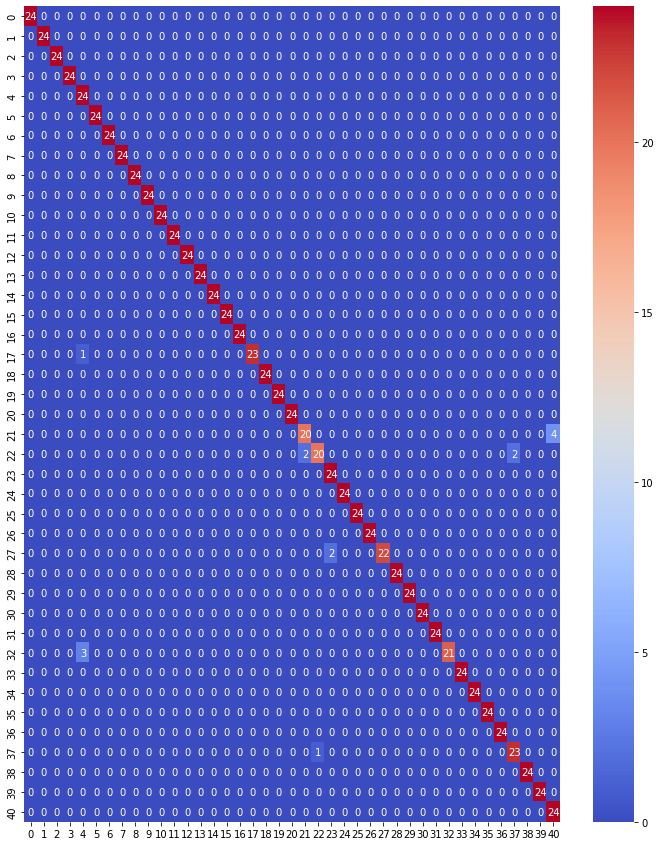

In [38]:
plt.figure(figsize=(12,15))
sns.heatmap(confusion_matrix(y_test,predict),annot=True,cbar=True,cmap='coolwarm')

**Function for prediction**

In [42]:
mapd = {'Fungal infection':'Dermatologist', 'Allergy':'Dermatologist', 'GERD':'Gastroenterologists', 'Chronic cholestasis':'Gastroenterologists',
       'Drug Reaction':'Allergists', 'Peptic ulcer diseae':'Gastroenterologists', 'AIDS':'Osteopathic', 'Diabetes':'Endocrinologist',
       'Gastroenteritis':'Gastroenterologists', 'Bronchial Asthma':'Pulmonologist', 'Hypertension':'Cardiologist', 'Migraine':'Neurologists',
       'Cervical spondylosis':'Orthopedic', 'Paralysis (brain hemorrhage)':'Neurologists', 'Jaundice':'Gastroenterologists',
       'Malaria':'Physician', 'Chicken pox':'Physician', 'Dengue':'Physician', 'Typhoid':'Physician', 'hepatitis A':'Hepatologist',
       'Hepatitis B':'Hepatologist', 'Hepatitis C':'Hepatologist', 'Hepatitis D':'Hepatologist', 'Hepatitis E':'Hepatologist',
       'Alcoholic hepatitis':'Hepatologist', 'Tuberculosis':'Pulmonologist', 'Common Cold':'Physician', 'Pneumonia':'Pulmonologist',
       'Dimorphic hemmorhoids(piles)':'Proctologist', 'Heart attack':'Cardiologist', 'Varicose veins':'Radiologist',
       'Hypothyroidism':'Endocrinologist', 'Hyperthyroidism':'Endocrinologist', 'Hypoglycemia':'Endocrinologist',
       'Osteoarthristis':'Rheumatologists', 'Arthritis':'Rheumatologists',
       '(vertigo) Paroymsal  Positional Vertigo':'Otolaryngologist', 'Acne':'Dermatologist',
       'Urinary tract infection':'Urologist', 'Psoriasis':'Dermatologist', 'Impetigo':'Dermatologist'}

def predict(s1,s2,s3,s4='vomiting',s5='vomiting',s6='vomiting',s7='vomiting'):
    l = [s1,s2,s3,s4,s5,s6,s7]
    print(l)
    
    x= np.array(df_s['Symptom'])
    y= np.array(df_s['weight'])
    for i in range(len(l)):
        for j in range(len(x)):
            if l[i]==x[j]:
                l[i]=y[j]
    res = [l]
    pred = clf_rfc.predict(res)
    return mapd[pred[0]]

In [43]:
predict('itching' ,'skin rash', 'nodal skin eruptions')

['itching', 'skin rash', 'nodal skin eruptions', 'vomiting', 'vomiting', 'vomiting', 'vomiting']


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 597 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 700 out of 700 | elapsed:    0.4s finished


'Physician'

**Save Model**

In [44]:
import csv
with open("mapping_Dataset.csv") as csv_file:
    # read the csv file
    csv_reader = csv.reader(csv_file)
 
    # now we can use this csv files into the pandas
    df = pd.DataFrame([csv_reader], index = None)

In [45]:
disease=str(predict('itching' ,'skin rash', 'nodal skin eruptions'))
print(type(disease))
print(disease)
#print(df[disease,:])


['itching', 'skin rash', 'nodal skin eruptions', 'vomiting', 'vomiting', 'vomiting', 'vomiting']


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 597 tasks      | elapsed:    0.3s


<class 'str'>
Physician


[Parallel(n_jobs=8)]: Done 700 out of 700 | elapsed:    0.4s finished


In [46]:
import pickle
pickle.dump(clf_rfc,open('RFC_symptoms.pkl','wb'))

In [48]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [49]:
!cp RFC_symptoms.sav /content/drive/MyDrive/model/RFC_symptoms.sav

'cp' is not recognized as an internal or external command,
operable program or batch file.


In [50]:
np.array(df_s["weight"])

array([1, 3, 4, 4, 5, 3, 3, 5, 3, 4, 3, 5, 6, 6, 4, 3, 4, 5, 3, 3, 5, 2,
       6, 5, 4, 7, 3, 4, 3, 4, 5, 3, 3, 4, 5, 4, 4, 3, 4, 4, 6, 5, 4, 4,
       6, 6, 7, 6, 6, 5, 5, 4, 5, 4, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 4, 4,
       4, 4, 5, 5, 5, 6, 5, 5, 4, 5, 4, 4, 3, 2, 2, 4, 5, 5, 6, 4, 4, 4,
       3, 4, 5, 6, 5, 4, 5, 3, 2, 2, 2, 3, 4, 6, 6, 4, 5, 4, 5, 4, 4, 3,
       3, 5, 2, 7, 6, 4, 5, 4, 5, 6, 4, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 3,
       5], dtype=int64)

In [51]:
import joblib
joblib.dump(clf_rfc,'RFC_symptoms.sav')

['RFC_symptoms.sav']